## [Fall 2021] CS 2302 - Lab 4 - Trees





## **Before you start**

Make a copy of this Colab by clicking on File > Save a Copy in Drive


In [ ]:
student_name = "Your name goes here"
student_id = "Your student id goes here"

## Overview

In this lab, you will implement and use a self-balancing binary search tree to solve a problem in the area of Natural Language Processing (NLP). You will also solve a tree problem similar to the ones companies use for technical interviews. 



### Grading
As stated in the syllabus, your lab consists of two parts: the source code  and the report. This colab counts as your source code submission only. However, for your report submission, you  are more than welcome to extend your colab to include what is required for the report. Alternatively, you can use any other text editor to write your lab report (Google Docs, Word, etc.). I personally recommend to stick to Google Colab as you can write code to draw the required plots, which makes the whole process simpler. 


## [80 points] Problem 1 - Natural Language Processing
[Natural Language Processing (NLP)](https://en.wikipedia.org/wiki/Natural_language_processing) is the sub-field of artificial intelligence that deals with designing algorithms, programs, and systems that can understand human languages in written and spoken forms.

[Word embeddings](https://en.wikipedia.org/wiki/Word_embedding) are an advance in NLP where words are represented by vectors in such a way that if two words have similar meanings, their embeddings (vector representations) are also similar. You do not need to understand how embeddings are built to work on this lab, but, if you are interestedd in learning more, read the following overview: https://nlp.stanford.edu/projects/glove/ 

In order to work in real-time, NLP systems such as Siri and Alexa need to efficiently retrieve the embeddings of a given set of words. In this lab, you will implement a simple version of this. The web page mentioned above contains links to files that contain word embeddings of various lengths for various vocabulary sizes. We will be using the *glove.6B.50d.zip* file (which can download [here](https://minersutep-my.sharepoint.com/:u:/g/personal/daguirre6_utep_edu/EcJurOL30oxFvtWrAoFdKuQBhJKOWIsSlrcMYNbXooF-gw?e=RrgrYO)). When decompressed, you'll notice that the file *glove.6B.50d.txt* contains word embeddings of length 50 for a very large number of words. Each line in the file starts with the word being described, followed by 50 floating point numbers that represent the word’s vector description (the embedding). The words are ordered by frequency of usage, so ”the” is the first word.

Download *glove.6B.50d.zip* by clicking [here](https://minersutep-my.sharepoint.com/:u:/g/personal/daguirre6_utep_edu/EcJurOL30oxFvtWrAoFdKuQBhJKOWIsSlrcMYNbXooF-gw?e=RrgrYO).

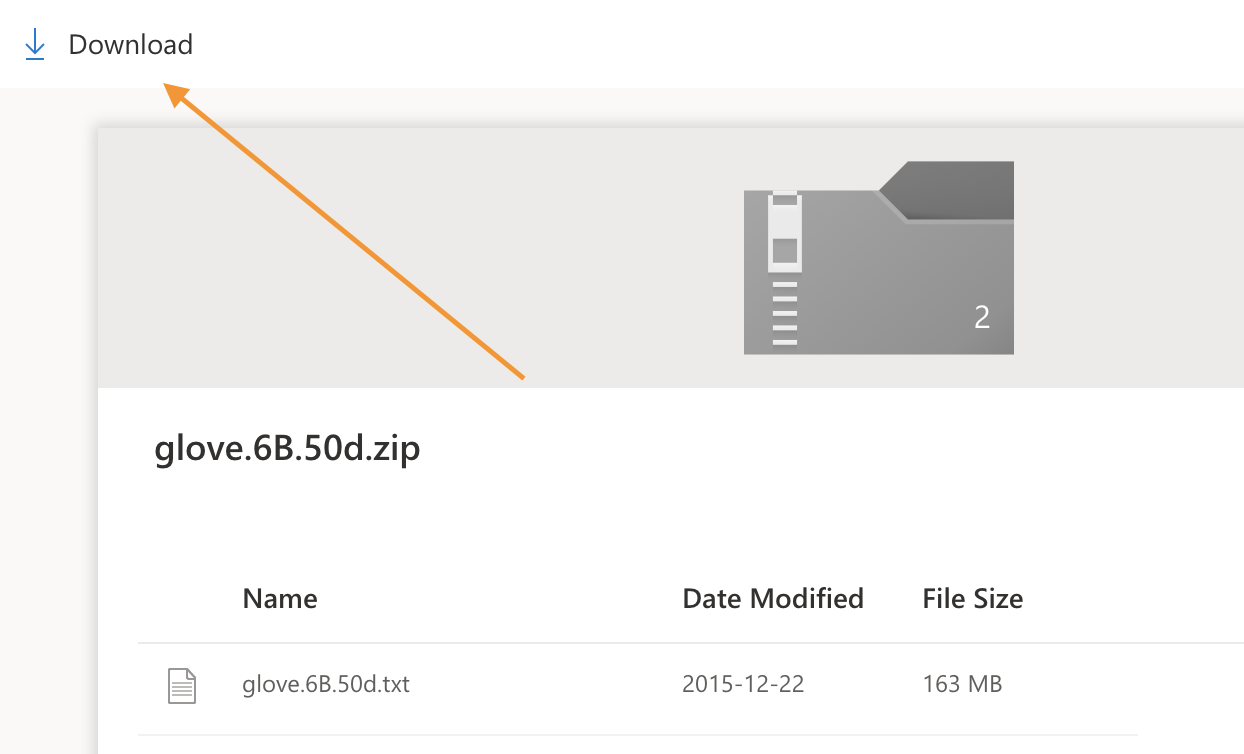




Run the following code cell to upload and read the embeddings contained in the file. 

In [ ]:
# Import the files package
from google.colab import files

# Get a list of the zip files that have been uploaded into your colab
# environment.
zip_uploaded = !ls *.zip

# If the zip file is not already in the colab enviroment, upload it
if ('glove.6B.50d.zip' not in zip_uploaded):
  uploaded = files.upload()

# Unzip file
import zipfile
with zipfile.ZipFile('glove.6B.50d.zip', 'r') as zip_ref:
    zip_ref.extractall()

# Read the resulting txt file and print the first 15 lines 
embeddings_file = open("glove.6B.50d.txt", "r", encoding="ISO-8859-1")
words_lst = []
embeddings_lst = []

for line in embeddings_file:
  tokens = line.replace("\n","").split(" ")
  word_text = tokens[0]
  word_embedding = []

  for i in range(1, len(tokens)):
    word_embedding.append(float(tokens[i]))

  words_lst.append(word_text)
  embeddings_lst.append(word_embedding)


print("Some words and their embedding representations:")
print("Word: ", words_lst[127], " Embedding: ", embeddings_lst[127])  
print("Word: ", words_lst[356], " Embedding: ", embeddings_lst[356])  
print("Word: ", words_lst[857], " Embedding: ", embeddings_lst[857])  

  

Saving glove.6B.50d.zip to glove.6B.50d.zip
Some words and their embedding representations:
Word:  then  Embedding:  [0.19565, -0.32773, 0.061642, -0.61557, 0.55709, 0.1319, -0.64021, 0.59467, -0.56031, -0.39703, 0.28233, 0.40593, -0.76741, -0.12291, 0.31465, 0.28005, -0.16861, -0.1576, -0.81441, -0.22847, 0.3412, 0.13389, 0.79958, 0.10831, 0.29309, -2.0116, 0.44809, 0.22424, 0.28911, -0.7811, 3.3622, -0.050498, -0.5573, -0.2944, 0.072648, 0.058602, 0.22786, 0.67369, 0.48985, -0.10922, 0.15652, 0.13199, -0.56275, -0.072733, -0.58805, 0.044076, 0.25782, -1.0728, -0.088545, -0.31418]
Word:  released  Embedding:  [-0.15806, -0.19103, 0.43238, 0.1308, -0.1658, 0.076669, -1.3808, -0.34227, 0.33677, 0.66352, 0.61321, 0.23311, -0.48095, 0.52691, 1.3159, -0.40253, -0.78368, -0.54847, -0.40491, 0.27453, 0.49518, 0.3465, 1.2538, -0.03604, -0.53149, -0.7298, -0.91684, -0.015769, -0.56, -0.35194, 3.0607, -1.3643, -0.30953, -0.3949, 0.018503, -0.0066648, 1.3842, -1.2486, -0.22105, -0.90173, -0.0537

Notice that *words_lst* is a list containing English words (such as then, released, trading) and *embeddings_lst* contains the vector representations of such words. That is, you'll find the vector representation of *words_lst[i]* in *embeddings_lst[i]*.

### Tasks

1) Implement a self-balancing binary search tree. You are free to select any type of tree from this list:
- [AVL](https://en.wikipedia.org/wiki/AVL_tree)
- [Red-Black](https://en.wikipedia.org/wiki/Red%E2%80%93black_tree)
- [AA](https://en.wikipedia.org/wiki/AA_tree)
- [Scapegoat](https://en.wikipedia.org/wiki/Scapegoat_tree)
- [Splay](https://en.wikipedia.org/wiki/Splay_tree)
- [Treap](https://en.wikipedia.org/wiki/Treap)

You are allowed to use someone else's implementation as long as it's publicly and freely available online. If you do so, you MUST cite the source. You may also make changes to the implementation if you need to do so to solve the rest of the problems in this lab.

2) Use *words_lst* and *embeddings_lst* to populate an instance of your self-balancing binary tree. Feel free to ignore ”words” that do not start with an alphabetic character (for example ”,” and ”.”). Also, feel free to code and use new classes if you think that would help in this process. 

3) Ask the user to input two words

    word1 = input("Input first word")
    word2 = input("Input second word")

and find and display the *similarity* of the words. To find the similarity of words *word1* and *word2* with embeddings *e1* and *e2*, use the cosine distance, which ranges from -1 to 1, given by:

\\(similarity(word1, word) = \frac{e1 \cdot e2}{|e1||e2|} \\)

where \\(e1 \cdot e2 \\) is the dot product of \\(e1\\) and \\(e2\\), and \\(|e1|\\) and \\(|e2|\\) are the magnitudes of \\(e1\\) and \\(e2\\). Feel free to look-up the dot product and magnitude formulas online if necessary. When the user inputs the two words, search for them in your tree to retrieve their embedding reepresentations. Search operations must be performed in O(log n) time.


Here are some examples of similarity scores your code should display given the following pairs of words:

- barley shrimp 0.5352693296408768 
- barley oat 0.6695943991361065 
- federer baseball 0.28697851474308855 
- federer tennis 0.7167608209373065 
- harvard stanford 0.8466463229405593 
- harvard utep 0.06842559024883524 
- harvard ant -0.026703792920826475 
- raven crow 0.615012250504612 
- raven whale 0.32908915459219595 
- spain france 0.7909148906835685 
- spain mexico 0.7513763544646808 
- mexico france 0.5477963415949284



In [ ]:
class TreeNode(object):
    def __init__(self, val,emb=None):
        self.val = val
        self.emb = emb
        self.left = None
        self.right = None
        self.height = 1

class AVL_Tree(object):
  """
  Recursive function to insert key in subtree
  rooted with node and returns new root of subtree
  Credit to GeeksforGeeks : https://www.geeksforgeeks.org/avl-tree-set-1-insertion/
                          : https://www.geeksforgeeks.org/binary-search-tree-set-1-search-and-insertion/
  """
  #search for nodes
  def search(self,root,key):
    #base case - root is null or key is present at root
    if root is None or root.val == key:
      return root
    
    # key is greater than roots key
    if root.val < key:
      return self.search(root.right,key)
    
    # key is smaller than roots key
    return self.search(root.left, key)

  def insert(self, root, key,embed=None):
    #step 1 - perform normal bst(binary search tree)
    if not root:
      return TreeNode(key,embed)
    elif key < root.val:
      root.left = self.insert(root.left, key,embed)
    else:
      root.right = self.insert(root.right, key,embed)
    #step 2 - update the height of the ancestor node
    # ancestor node
    root.height = 1 + max(self.getHeight(root.left), self.getHeight(root.right))

    #step 3 - get the balance factor
    balance = self.getBalance(root)

    #step 4 - if the node is unbalanced, then try out the 4 cases
    #Case 1 - left left
    if balance > 1 and key < root.left.val:
      return self.rightRotate(root)

    #Case 2- right right
    if balance < -1 and key > root.right.val:
      return self.leftRotate(root)

    #Case 3 - left right
    if balance > 1 and key > root.left.val:
      root.left = self.leftRotate(root.left)
      return self.rightRotate(root)
    
    #Case 4 - right left
    if balance < -1 and key < root.right.val:
      root.right = self.rightRotate(root.right)
      return self.leftRotate(root)

    return root 

  def leftRotate(self, z):
    y = z.right
    T2 = y.left
    
    #perform rotation 
    y.left = z
    z.right = T2

    #update height
    z.height = 1 + max(self.getHeight(z.left), self.getHeight(z.right))
    y.height = 1 + max(self.getHeight(y.left), self.getHeight(y.right))

    #return the new root
    return y

  def rightRotate(self, z):
    y = z.left
    T3 = y.right

    #perform rotation
    y.right = z
    z.left = T3

    #update heights
    z.height = 1 + max(self.getHeight(z.left),self.getHeight(z.right))
    y.height = 1 + max(self.getHeight(y.left), self.getHeight(y.right))

    return y

  def getHeight(self, root):
    if not root:
      return 0
    
    return root.height

  def getBalance(self, root):
    if not root:
      return 0

    return self.getHeight(root.left) - self.getHeight(root.right)

  def preOrder(self, root):
    if not root:
      return
    print("{0} ".format(root.val),end="")
    self.preOrder(root.left)
    self.preOrder(root.right)



In [ ]:

# Your code here (feel free to add as many code cells as you want)

#import numpy to simplfiy vector computation
import numpy as np 

#init the tree
bst = AVL_Tree()

#set root pointer
root = None

#append to bst simmilar to key -> pair (dict)
for word,embed in zip(words_lst,embeddings_lst):
  root = bst.insert(root,word,np.array(embed))


In [ ]:

"""
    ###
    Tests
    ###
    barley shrimp 0.5352693296408768
    barley oat 0.6695943991361065
    federer baseball 0.28697851474308855
    federer tennis 0.7167608209373065
    harvard stanford 0.8466463229405593
    harvard utep 0.06842559024883524
    harvard ant -0.026703792920826475
    raven crow 0.615012250504612
    raven whale 0.32908915459219595
    spain france 0.7909148906835685
    spain mexico 0.7513763544646808
    mexico france 0.5477963415949284

"""
#import time
import time
#timer decorator
def time_measure(func):
  #function wrap
  def wrapper(e1,e2):
    #start time count
    t0 = time.time()
    func(e1,e2) # call function inside wrapper
    return time.time()-t0
  return wrapper

#method to compute simmilarity - apply decorator
@time_measure
def simmilarity(e1,e2):
  #word1_emb dot to word2_emb
  num = e1 @ e2
  dena = np.sqrt(np.sum(e1 * e1))
  denb = np.sqrt(np.sum(e2 * e2))
  return num / (dena * denb)
  
word1 = input("Input first word : ")
word2 = input("Input second word : ")

word1_embeding = bst.search(root,word1)
word2_embeding = bst.search(root,word2)

print(f"{word1}\t{word2} = {simmilarity(word1_embeding.emb,word2_embeding.emb)}")

Input first word : harvard
Input second word : utep
harvard	utep = 6.532669067382812e-05


## [20 points] Problem 2 - Average of Levels

Given the root of a binary tree, return the average value of the nodes at each level.  Feel free to write a helper (recursive) method.

```
Example:
Input:
    3
   /  \
  9  20
    /  \
   15   7
Output: [3, 14.5, 11]
```

In [ ]:

# Solution 

# You are allowed to modify the code in the cell as you please, 
# just don't change the method signature.

def average_of_levels(root):
  returnval = []
  # traverse by levels
  q = Queue()
  q.put(root)
  while(not q.empty()):
    levelSum = 0
    count = 0
    temp = Queue()
    while(not q.empty()):
      n = q.queue[0]
      q.get()
      levelSum += n.val
      count += 1
      if n.left is not None:
        temp.put(n.left)
      if n.right is not None:
        temp.put(n.right)
    q = temp
    returnval.append(levelSum * 1.0 / count)
  
  return returnval

Test your implementation by calling it multiple times with different input values and comparing the output produced by your method and the expected output. For each test, add a short comment explaining why you think that test is appropiate. Do not write an excesive amount of tests; just write the number of tests you think you need and justify your decisions. 

In [ ]:
# Sample Test Case(s)

# The next few lines of code build this tree
#      3
#    /   \
#   10    20
#  /     /  \
# 8     15   7

root = TreeNode(3.0)
root.left = TreeNode(10.0)
root.right = TreeNode(20.0)
root.left.left = TreeNode(8.0)
root.right.left = TreeNode(15.0)
root.right.right = TreeNode(7.0)

assert average_of_levels(root) == [3.0, 15.0, 10.0] , "Test 1 - Fail"



# Your test cases - Start



# Your test cases - End


print("All tests passed")

All tests passed


## How to Submit This Lab

1. File > Download .ipynb
2. Go to Blackboard, find the lab submission page, and upload the .ipynb file you just downloaded.

## Grading Rubric

|     Criteria    	|     Proficient    	|     Satisfactory    	|     Unsatisfactory    	|
|-	|-	|-	|-	|
|     Correctness    	|     The code compiles, runs, and solves the problem.                	|     The code compiles, runs, but does not solve the problem (partial implementation).    	|     The code does not compile/run, or little progress was made.          	|
|     Space and Time </br> complexities    	|     Appropriate for the problem.    	|     Can be greatly improved.    	|     Space and time complexity not analyzed     	|
|     Problem Decomposition    	|     Operations are broken down into loosely coupled, highly cohesive   methods    	|     Operations are broken down into methods, but they are not loosely   coupled/highly cohesive    	|     Most of the logic is inside a couple of big methods          	|
|     Style    	|     Variables and methods have meaningful/appropriate names     	|     Only a subset of the variables and methods have   meaningful/appropriate names     	|     Few or none of the variables and methods have meaningful/appropriate   names     	|
|     Robustness    	|     Program handles erroneous or unexpected input gracefully    	|     Program handles some erroneous or unexpected input gracefully    	|     Program does not handle erroneous or unexpected input gracefully    	|
|     Documentation    	|     Non-obvious code segments are well documented    	|     Some non-obvious code segments are documented    	|     Few or none non-obvious segments are documented    	|
|     Report     	|     Covers all required material in a concise and clear way with proper   grammar and spelling.    	|     Covers a subset of the required material in a concise and clear way   with proper grammar and spelling.    	|     Does not cover enough material and/or the material is not presented   in a concise and clear way with proper grammar and spelling.    	|